In [70]:
!pip install tensorflow


In [71]:
!pip install pandas-datareader

In [72]:
### Data Collection
import pandas_datareader as pdr
key=""

In [73]:
!pip install yfinance

In [74]:
!pip install mplfinance

In [75]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import os

In [76]:
import yfinance as yf

In [77]:
# Fetch historical data from Yahoo Finance
ticker = '^NSEI'
data = yf.download(ticker, start='2009-01-01', end='2024-01-01', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [78]:
# Calculate a 200-day moving average and save it as a new column
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Convert NaN values in the SMA_200 column to 0
data['SMA_200'] = data['SMA_200'].fillna(0)

# Save the updated DataFrame to a CSV file
data.to_csv('nifty_50_with_SMA_200.csv')

# Display the first few rows to confirm
print(data[['Close', 'SMA_200']].tail())

Price                             Close       SMA_200
Ticker                            ^NSEI              
Date                                                 
2023-12-22 00:00:00+00:00  21349.400391  19059.552842
2023-12-26 00:00:00+00:00  21441.349609  19079.505088
2023-12-27 00:00:00+00:00  21654.750000  19101.169336
2023-12-28 00:00:00+00:00  21778.699219  19122.091084
2023-12-29 00:00:00+00:00  21731.400391  19142.190840


In [79]:

# Save the data to a CSV file
data.to_csv('nifty_50.csv')

print("Data saved to nifty_50_data.csv")


Data saved to nifty_50_data.csv


In [80]:
data=pd.read_csv('nifty_50.csv')

In [81]:
data.head()

,Price,Adj Close,Close,High,Low,Open,Volume,SMA_200
0,Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,NaN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-02 00:00:00+00:00,3046.75,3046.75,3079.85009765625,3021.800048828125,3034.60009765625,0,0.0
3,2009-01-05 00:00:00+00:00,3121.449951171875,3121.449951171875,3131.949951171875,3056.449951171875,3058.75,0,0.0
4,2009-01-06 00:00:00+00:00,3112.800048828125,3112.800048828125,3141.800048828125,3056.10009765625,3121.5,0,0.0


In [82]:
# Drop rows with index 0 and 1
data = data.drop(index=[0, 1])

In [83]:
data.head()

,Price,Adj Close,Close,High,Low,Open,Volume,SMA_200
2,2009-01-02 00:00:00+00:00,3046.75,3046.75,3079.85009765625,3021.800048828125,3034.60009765625,0,0.0
3,2009-01-05 00:00:00+00:00,3121.449951171875,3121.449951171875,3131.949951171875,3056.449951171875,3058.75,0,0.0
4,2009-01-06 00:00:00+00:00,3112.800048828125,3112.800048828125,3141.800048828125,3056.10009765625,3121.5,0,0.0
5,2009-01-07 00:00:00+00:00,2920.39990234375,2920.39990234375,3147.199951171875,2888.199951171875,3112.800048828125,0,0.0
6,2009-01-09 00:00:00+00:00,2873.0,2873.0,2929.85009765625,2810.25,2919.949951171875,0,0.0


In [84]:
df1=data.reset_index()['Close']


In [85]:
df2=data.reset_index()['SMA_200']
df2


0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
            ...     
3670    19059.552842
3671    19079.505088
3672    19101.169336
3673    19122.091084
3674    19142.190840
Name: SMA_200, Length: 3675, dtype: float64

In [86]:
data.tail()

,Price,Adj Close,Close,High,Low,Open,Volume,SMA_200
3672,2023-12-22 00:00:00+00:00,21349.400390625,21349.400390625,21390.5,21232.44921875,21295.849609375,284700,19059.552842
3673,2023-12-26 00:00:00+00:00,21441.349609375,21441.349609375,21477.150390625,21329.44921875,21365.19921875,219500,19079.505088
3674,2023-12-27 00:00:00+00:00,21654.75,21654.75,21675.75,21495.80078125,21497.650390625,256500,19101.169336
3675,2023-12-28 00:00:00+00:00,21778.69921875,21778.69921875,21801.44921875,21678.0,21715.0,393100,19122.091084
3676,2023-12-29 00:00:00+00:00,21731.400390625,21731.400390625,21770.30078125,21676.900390625,21737.650390625,270900,19142.190840


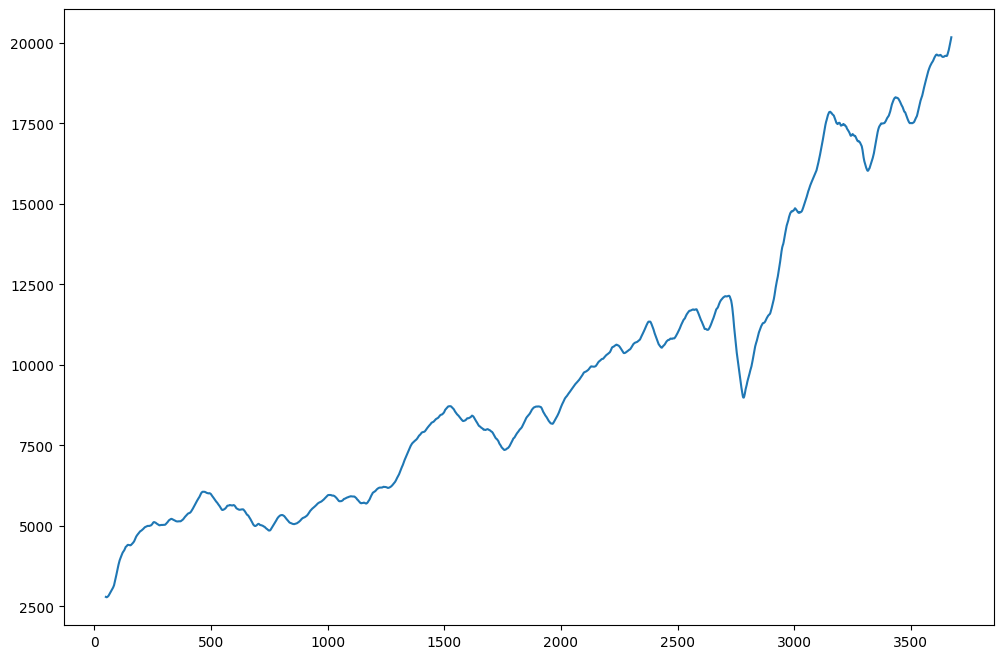

In [87]:
# Aggregate the data
aggregated_df1 = df1.rolling(window=50).mean()  # Adjust the window size as needed
plt.figure(figsize=(12, 8))
plt.plot(aggregated_df1)
plt.show()


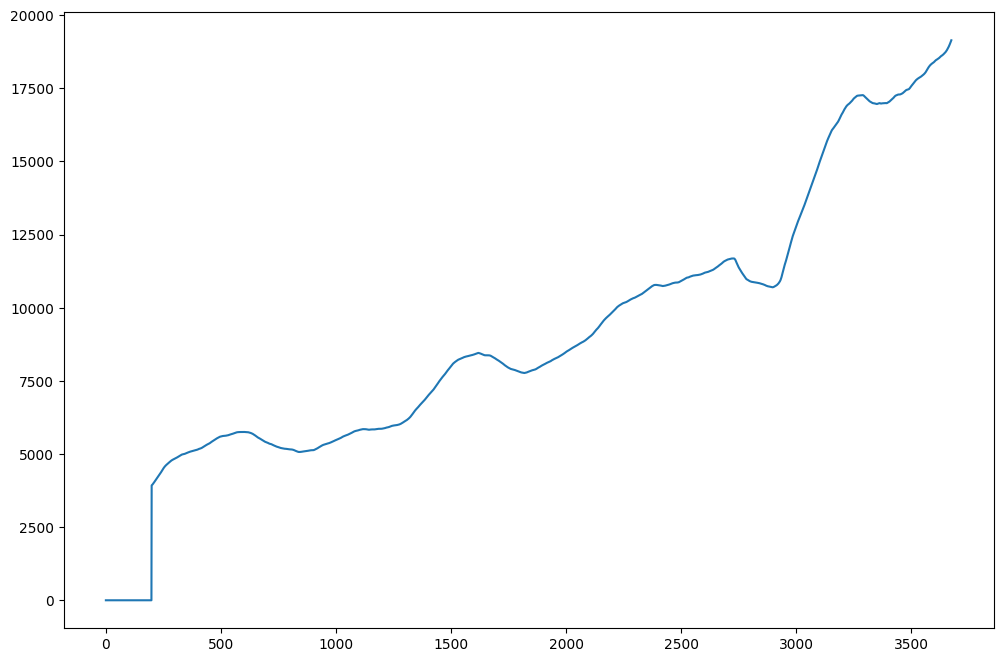

In [88]:
# Set the figure size
plt.figure(figsize=(12, 8))  # Width, Height in inches

# Plot the data
plt.plot(df2)

# Display the plot
plt.show()

In [89]:
import numpy as np

In [90]:
df1

0                 3046.75
1       3121.449951171875
2       3112.800048828125
3        2920.39990234375
4                  2873.0
              ...        
3670      21349.400390625
3671      21441.349609375
3672             21654.75
3673       21778.69921875
3674      21731.400390625
Name: Close, Length: 3675, dtype: object

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [92]:
print(data)


                          Price          Adj Close              Close  \
2     2009-01-02 00:00:00+00:00            3046.75            3046.75   
3     2009-01-05 00:00:00+00:00  3121.449951171875  3121.449951171875   
4     2009-01-06 00:00:00+00:00  3112.800048828125  3112.800048828125   
5     2009-01-07 00:00:00+00:00   2920.39990234375   2920.39990234375   
6     2009-01-09 00:00:00+00:00             2873.0             2873.0   
...                         ...                ...                ...   
3672  2023-12-22 00:00:00+00:00    21349.400390625    21349.400390625   
3673  2023-12-26 00:00:00+00:00    21441.349609375    21441.349609375   
3674  2023-12-27 00:00:00+00:00           21654.75           21654.75   
3675  2023-12-28 00:00:00+00:00     21778.69921875     21778.69921875   
3676  2023-12-29 00:00:00+00:00    21731.400390625    21731.400390625   

                   High                Low               Open  Volume  \
2      3079.85009765625  3021.800048828125   3034.

In [93]:
# Select 'Close' and 'SMA_200' columns
df_close_sma = data[['Close', 'SMA_200']].values

In [94]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_close_sma_scaled = scaler.fit_transform(df_close_sma)

In [95]:
# Define the split ratio
training_size = int(len(df_close_sma_scaled) * 0.65)

In [96]:

test_size=len(df_close_sma_scaled)-training_size
train_data,test_data=df_close_sma_scaled[0:training_size,:],df_close_sma_scaled[training_size:len(df_close_sma_scaled),:1]

In [97]:
training_size,test_size

(2388, 1287)

In [98]:
train_data

array([[0.02465954, 0.        ],
       [0.02854904, 0.        ],
       [0.02809866, 0.        ],
       ...,
       [0.40318036, 0.56306802],
       [0.4048257 , 0.56310853],
       [0.40237849, 0.56312132]])

In [99]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), :]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [100]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [101]:
print(X_train.shape), print(y_train.shape)

(2287, 100, 2)
(2287,)


(None, None)

In [102]:
print(X_test.shape), print(ytest.shape)

(1186, 100, 1)
(1186,)


(None, None)

In [103]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select 'Close' and 'SMA_200' columns
df_close_sma = data[['Close', 'SMA_200']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_close_sma_scaled = scaler.fit_transform(df_close_sma)

# Define the split ratio
training_size = int(len(df_close_sma_scaled) * 0.65)

# Split the data into training and testing sets
train_data = df_close_sma_scaled[:training_size]
test_data = df_close_sma_scaled[training_size:]

# Function to create dataset matrices
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i + time_step), :]  # Use all features (Close and SMA_200)
        X.append(a)
        y.append(dataset[i + time_step, 0])  # Predicting 'Close'
    return np.array(X), np.array(y)

# Reshape into X=t,t+1,t+2,...,y=t+1
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# Check the shapes before reshaping
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 2)  # 2 features: Close and SMA_200
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 2)      # 2 features: Close and SMA_200


X_train shape: (2288, 100, 2)
X_test shape: (1187, 100, 2)


In [104]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 2)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 2)

In [105]:
!pip install tensorflow

In [106]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [107]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)



from sklearn.linear_model import Ridge, Lasso

model = Ridge(alpha=1.0)  # L2 Regularization
# or
model = Lasso(alpha=1.0)  # L1 Regularization



# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 2)))  # input shape updated to (100, 2)
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))  # Output layer to predict 'Close'
model.compile(loss='mean_squared_error', optimizer='adam')



c:\Users\Ankur\anaconda3\envs\gpu_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [108]:
# Summary of the model
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,051 (199.42 KB)

 Trainable params: 51,051 (199.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - loss: 0.0196 - val_loss: 0.0172
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 214ms/step - loss: 4.6027e-04 - val_loss: 9.3462e-04
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - loss: 1.4768e-04 - val_loss: 7.2635e-04
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 1.2452e-04 - val_loss: 7.0873e-04
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 1.1804e-04 - val_loss: 7.1005e-04
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 1.1178e-04 - val_loss: 6.9038e-04
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 1.1349e-04 - val_loss: 7.4960e-04
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 1.1116e-04 - val_loss: 7.0815e-04
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 1.0785e-04 - val_loss: 6.9435e-04
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 1.0679e-04 - val_loss: 0.0011
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 1.11

In [109]:
import tensorflow as tf

In [110]:
import math
from sklearn.metrics import mean_squared_error


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Test RMSE: 15251.132664786966


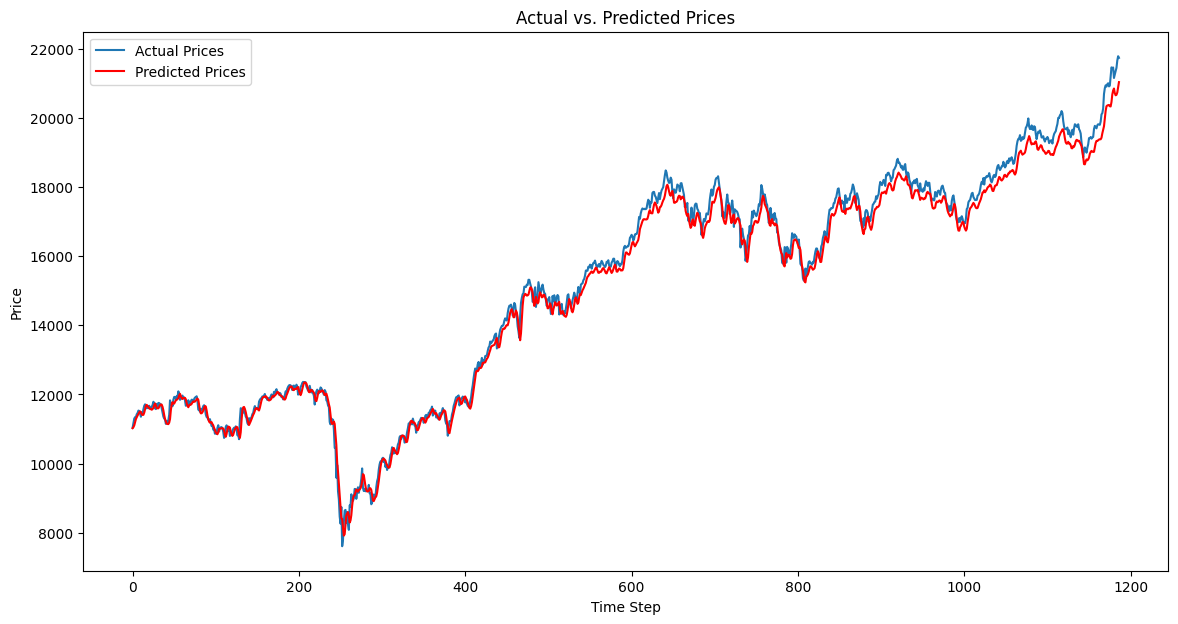

In [111]:
# Make predictions on the test data
test_predict = model.predict(X_test)

# Prepare the array for inverse transformation
predicted_data = np.zeros((test_predict.shape[0], 2))
predicted_data[:, 0] = test_predict.flatten()  # Predicted Close prices

# Use the last available SMA_200 values for inverse transformation
# Ensure we're using SMA_200 values from the original test dataset
sma_200_values = test_data[100:, 1]  # Get the SMA_200 values
predicted_data[:, 1] = sma_200_values.flatten()  # Add to the predicted data

# Inverse transform the predicted Close prices
predicted_prices = scaler.inverse_transform(predicted_data)[:, 0]

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(ytest, predicted_prices))
print("Test RMSE:", rmse)

# Plot actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(test_data[100:, :])[:, 0], label='Actual Prices')  # Actual Close prices
plt.plot(predicted_prices, label='Predicted Prices', color='red')  # Predicted Close prices
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()


In [112]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


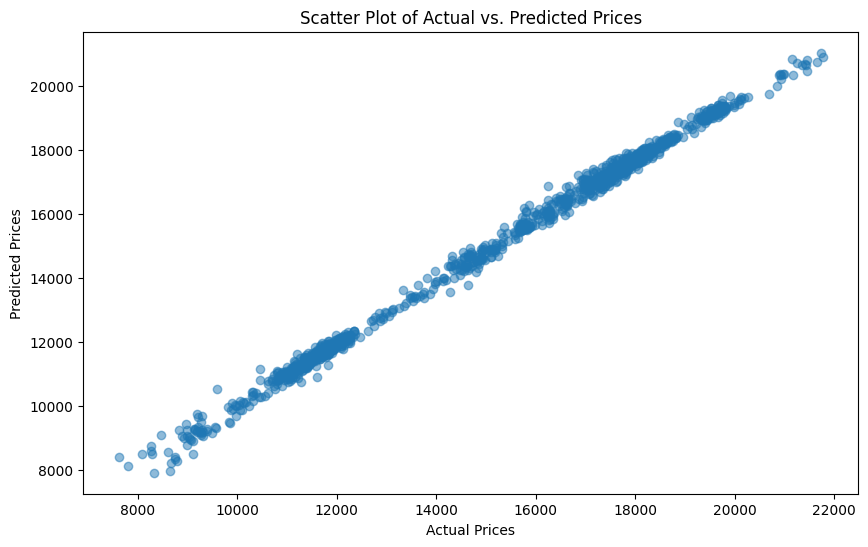

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scaler.inverse_transform(test_data[100:, :])[:, 0], predicted_prices, alpha=0.5)
plt.title('Scatter Plot of Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


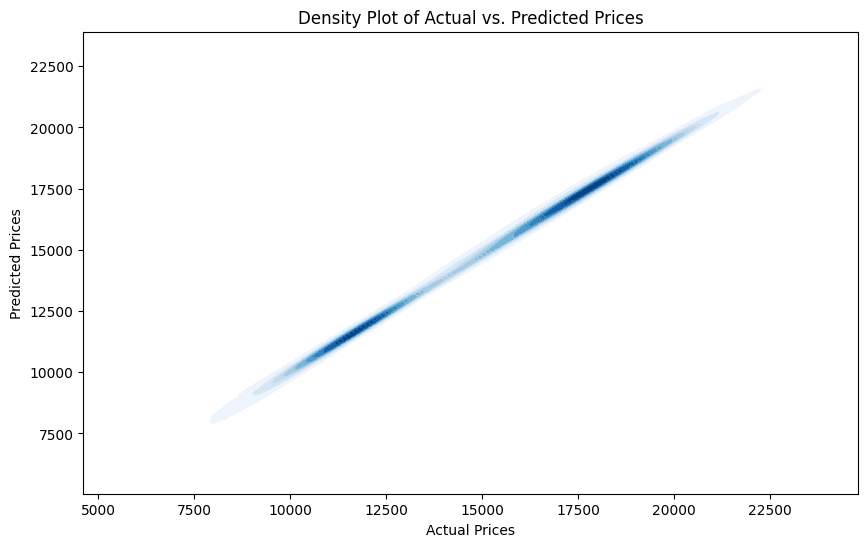

In [114]:
# Heatmap-like density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=scaler.inverse_transform(test_data[100:, :])[:, 0], 
    y=predicted_prices, 
    cmap="Blues", fill=True
)
plt.title('Density Plot of Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


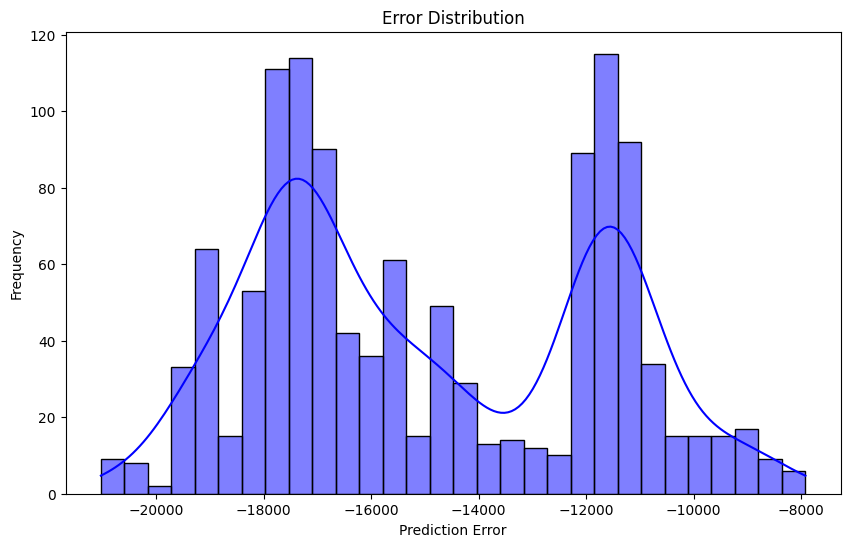

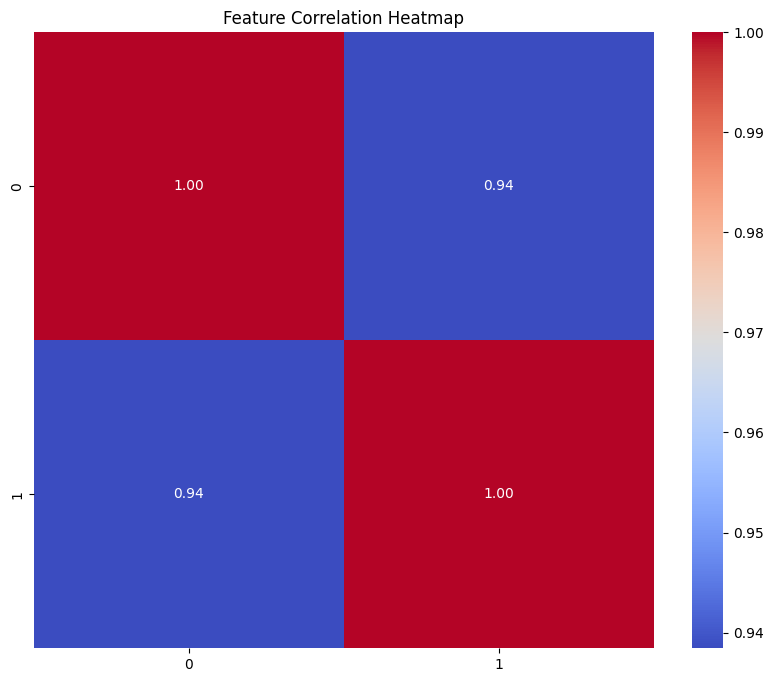

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the error distribution
errors = ytest - predicted_prices

# Plot the error distribution
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='blue')
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap of the features in the test data
plt.figure(figsize=(10, 8))
sns.heatmap(np.corrcoef(test_data.T), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [116]:
len(test_data)

1287

In [117]:
x_input=test_data[1297:].reshape(1,-1)
x_input.shape

(1, 0)

In [118]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [119]:
temp_input

[]

In [120]:
# demonstrate prediction for next 10 days
from numpy import array

last_100_closes = df1[-100:].flatten().tolist()  # Last 100 Close prices from df1
last_100_smas = data['SMA_200'].values[-100:].tolist()  # Last 100 SMA_200 values from the data

# Combine them into temp_input
temp_input = [[last_100_closes[i], last_100_smas[i]] for i in range(100)]

# Now you can proceed to predict
lst_output = []
n_steps = 100
i = 0

# Loop for predicting the next 10 days
while i < 10:  # Change to 10 for predicting the next 10 days
    if len(temp_input) == n_steps:  # Check if we have exactly 100 entries
        # Prepare the input for the model
        x_input = np.array(temp_input).reshape(1, n_steps, 2)  # Reshape to [samples, time steps, features]
        print("{} day input {}".format(i, x_input))

        # Make prediction
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))

        # Extend temp_input with the new predicted value and last SMA_200 value
        # Use the last known SMA_200 value for the next prediction
        temp_input.append([yhat[0][0], temp_input[-1][1]])  # New closing price and last SMA_200
        lst_output.append(yhat[0][0])  # Store predicted closing price

        # Remove the first entry to maintain the window size
        temp_input = temp_input[1:]  # Maintain the size of temp_input
        i += 1
    else:
        print("Not enough data to make a prediction. Current size of temp_input: {}".format(len(temp_input)))
        break  # Exit if not enough data

print("Predicted closing prices for the next 10 days:", lst_output)

0 day input [[[8.75189780e-01 1.82174158e+04]
  [8.82237202e-01 1.82290723e+04]
  [8.86418326e-01 1.82404998e+04]
  [8.85041059e-01 1.82509193e+04]
  [8.88253733e-01 1.82615208e+04]
  [8.83596164e-01 1.82714166e+04]
  [8.77618786e-01 1.82806766e+04]
  [8.77944213e-01 1.82891956e+04]
  [8.79529652e-01 1.82982388e+04]
  [8.74335840e-01 1.83063803e+04]
  [8.71466898e-01 1.83139971e+04]
  [8.75811956e-01 1.83209041e+04]
  [8.75960330e-01 1.83271593e+04]
  [8.78436218e-01 1.83339651e+04]
  [8.75452664e-01 1.83406351e+04]
  [8.69157690e-01 1.83463783e+04]
  [8.71253438e-01 1.83518946e+04]
  [8.73159117e-01 1.83578228e+04]
  [8.73408984e-01 1.83644191e+04]
  [8.68532871e-01 1.83689396e+04]
  [8.77983264e-01 1.83744703e+04]
  [8.82851649e-01 1.83800973e+04]
  [8.85251976e-01 1.83859236e+04]
  [8.87134265e-01 1.83922593e+04]
  [8.93174186e-01 1.83993563e+04]
  [8.98011248e-01 1.84076563e+04]
  [9.07196114e-01 1.84164171e+04]
  [9.07032079e-01 1.84250468e+04]
  [9.11030963e-01 1.84329763e+04]
  

In [121]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [122]:
import matplotlib.pyplot as plt

In [123]:
len(df_close_sma_scaled)

3675

In [124]:
# Debugging output
print("Length of lst_output:", len(lst_output))
print("Contents of lst_output:", lst_output)


Length of lst_output: 10
Contents of lst_output: [-0.5337637, -0.5337637, -0.5337637, -0.5337637, -0.5337637, -0.5337637, -0.5337637, -0.5337637, -0.5337637, -0.5337637]


In [125]:
# Ensure lst_output is a numpy array and reshaped correctly
if lst_output:  # Proceed only if lst_output is not empty
    lst_output_reshaped = np.array(lst_output).reshape(-1, 1)  # Reshape for scaler

    # Check the shape of lst_output_reshaped
    print("Shape of lst_output_reshaped:", lst_output_reshaped.shape)
else:
    print("No predictions available in lst_output. Please check your prediction loop.")


Shape of lst_output_reshaped: (10, 1)


In [126]:
# Ensure day_pred is created correctly
day_pred = np.arange(len(df_close_sma_scaled), len(df_close_sma_scaled) + len(lst_output))

# Debugging output
print("Length of day_pred:", len(day_pred))


Length of day_pred: 10


In [127]:
# Check the length of df_close_sma_scaled
print("Length of df_close_sma_scaled:", len(df_close_sma_scaled))


Length of df_close_sma_scaled: 3675


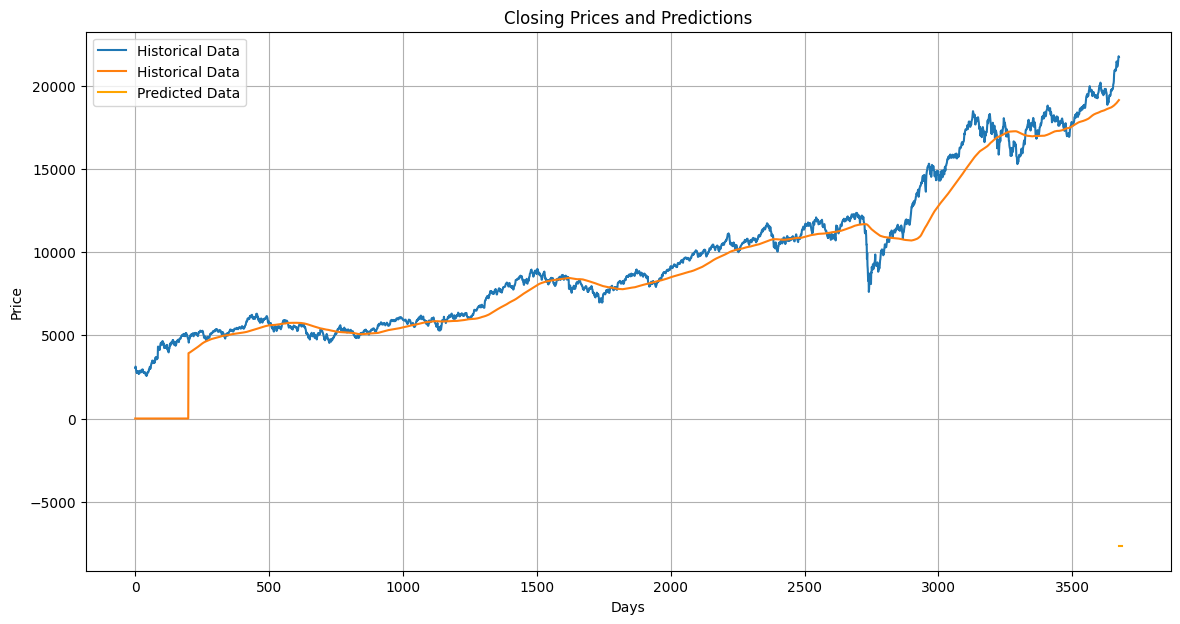

In [128]:
# Assuming lst_output contains only the predictions for closing prices
if len(lst_output) > 0:
    # Reshape lst_output to match the scaler's expected input
    lst_output_reshaped = np.array(lst_output).reshape(-1, 1)

    # Create a dummy second column of zeros with the same number of rows as lst_output
    dummy_column = np.zeros((lst_output_reshaped.shape[0], 1))

    # Combine the dummy column with lst_output to create a 2D array
    lst_output_combined = np.hstack((lst_output_reshaped, dummy_column))

    # Proceed with inverse transformation
    try:
        predicted_prices = scaler.inverse_transform(lst_output_combined)
        
        # Prepare day_pred based on the length of df_close_sma_scaled and lst_output
        day_pred = np.arange(len(df_close_sma_scaled), len(df_close_sma_scaled) + len(lst_output))

        plt.figure(figsize=(14, 7))

        # Plot historical data
        start_index = max(0, len(df_close_sma_scaled) - 3990)  # Avoid negative index
        plt.plot(np.arange(len(df_close_sma_scaled)), scaler.inverse_transform(df_close_sma_scaled), label='Historical Data')

        # Plot the predictions
        plt.plot(day_pred, predicted_prices[:, 0], label='Predicted Data', color='orange')  # Use only the first column for plotting

        # Add titles and labels
        plt.title('Closing Prices and Predictions')
        plt.xlabel('Days')
        plt.ylabel('Price')
        plt.legend()
        plt.grid()
        plt.show()
    except ValueError as e:
        print("Error during inverse transformation:", e)
else:
    print("No predictions available in lst_output.")


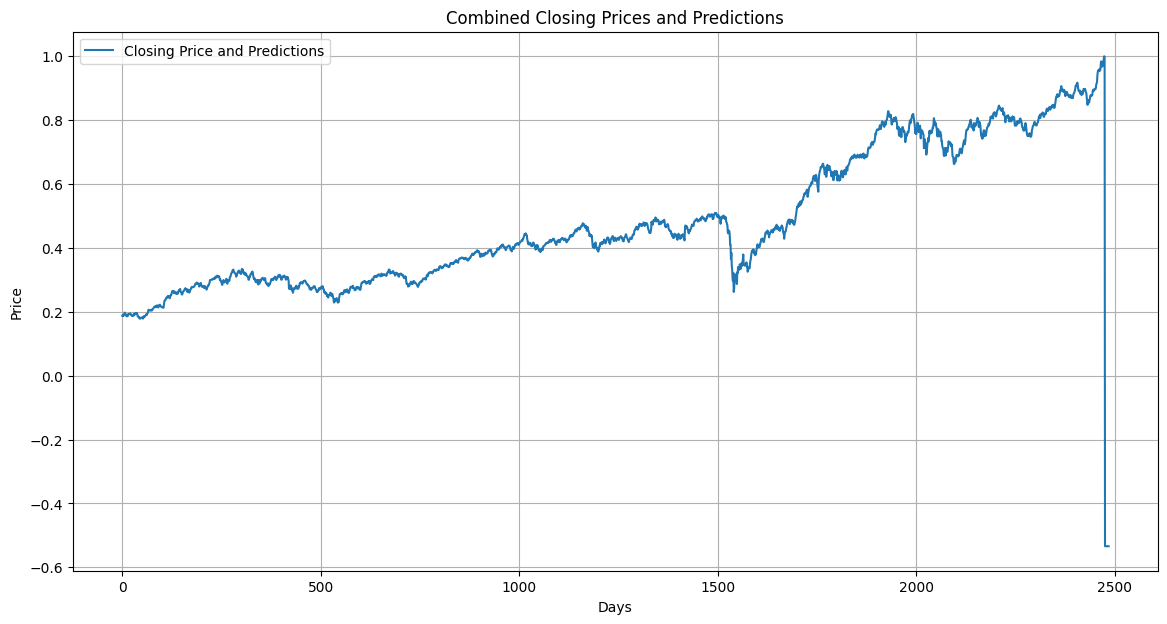

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Convert df_close_sma_scaled to a list
df3 = df_close_sma_scaled.tolist()

# Ensure lst_output is a 2D array (if it's not already)
if len(lst_output) > 0:
    # Reshape lst_output to ensure it's 2D
    lst_output_reshaped = np.array(lst_output).reshape(-1, 1)

    # Create a dummy second column of zeros to match the two-column structure
    dummy_column = np.zeros((lst_output_reshaped.shape[0], 1))

    # Combine the predictions with the dummy column
    lst_output_combined = np.hstack((lst_output_reshaped, dummy_column))

    # Extend df3 with the combined predictions
    for item in lst_output_combined:
        df3.append(item.tolist())  # Append each prediction as a list

# Convert df3 back to a NumPy array for plotting
df3_np = np.array(df3)

# Ensure df3_np has at least 1200 rows
if df3_np.shape[0] > 1200:
    plt.figure(figsize=(14, 7))
    plt.plot(df3_np[1200:, 0], label='Closing Price and Predictions')  # Use the first column for plotting
    plt.title('Combined Closing Prices and Predictions')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Not enough data in df3 to plot from index 1200.")


In [130]:
df3=scaler.inverse_transform(df3).tolist()

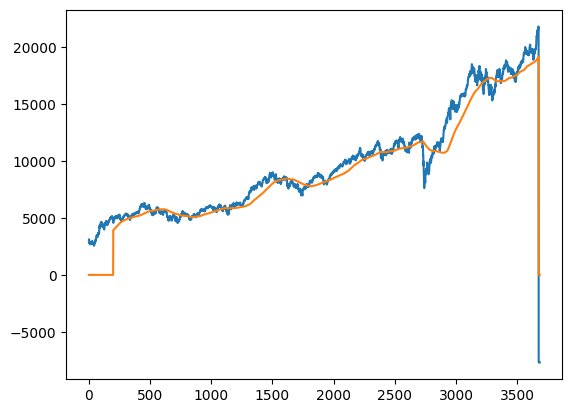

In [131]:
plt.plot(df3)